# Solution: Manual calibration of an SIR model (part 1)

**Plotting the epidemic curve:**

Loading required package: ggplot2


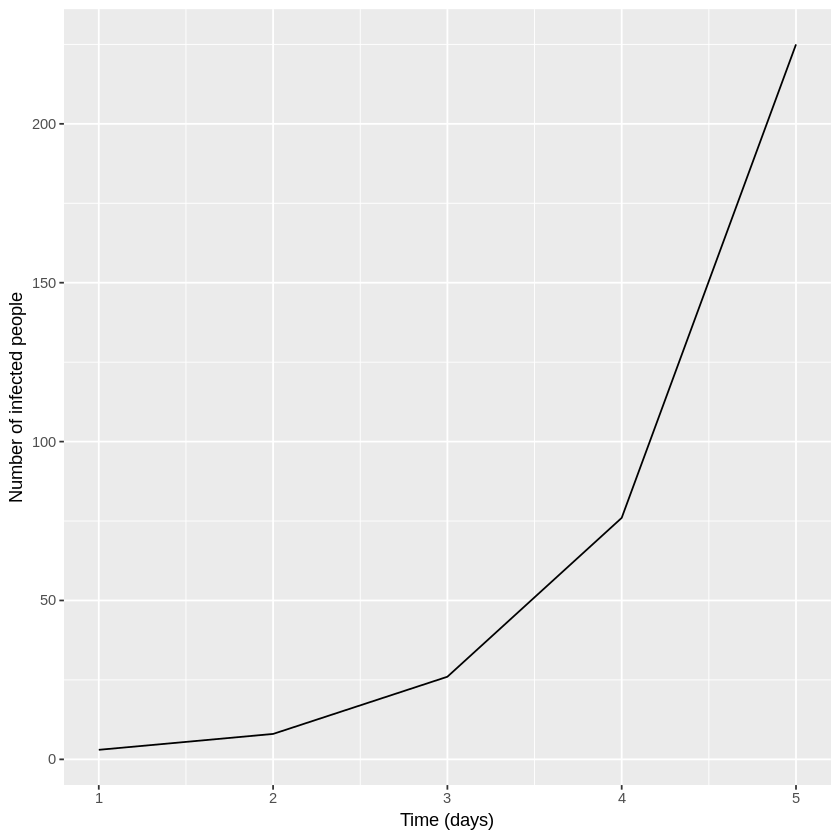

In [1]:
data <- data.frame(time = 1:5,
                   number_infected = c(3,8,26,76,225))

require(ggplot2)
ggplot(data = data) +
    geom_line(aes(x = time, y = number_infected)) +
    labs(x = "Time (days)", y = "Number of infected people")

### Based on the plot, what does the data represent?

The epidemic curve shows an exponentially increasing number of infected people, which means the data corresponds to the initial growth phase of the epidemic.

### Based on the code, what is the total size of the population you are modelling? For plotting, which variables in the model output correspond to the variables in the dataset? 

The code shows that the initial conditions for S, I and R are 762, 1 and 0, which means the total population size is 763. The code shown is for the simple SIR model, so the I column in the model output corresponds to the observed data of the prevalence of infected people.

**Example of the manual calibration:**

As an arbitrary choice of parameters, let's first try $\beta$ = 0.6 days$^{-1}$, and $\gamma$ = 0.1 days$^{-1}$ (remembering that we want $\beta$/$\gamma$ > 1, so that $\beta$ > $\gamma$).

Loading required package: deSolve
Loading required package: reshape2


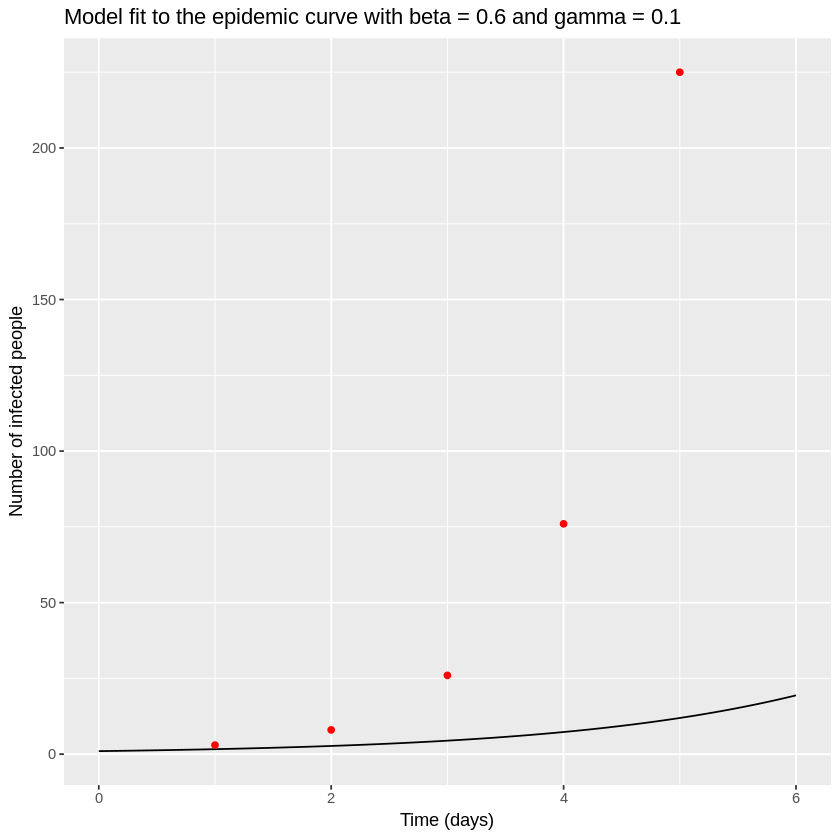

In [2]:
# PACKAGES
require(deSolve)
require(reshape2)
require(ggplot2)

# INPUT
initial_state_values <- c(S = 762,  
                          I = 1,       
                          R = 0)

# Adding the parameters vector
parameters <- c(beta = 0.6,
                gamma = 0.1)

times <- seq(from = 0, to = 6, by = 0.1)

# MODEL FUNCTION
sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {
    
    N <- S+I+R
    
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               
    dI <- lambda * S - gamma * I
    dR <- gamma * I             
    
    # Output
    return(list(c(dS, dI, dR))) 
  })
}
    
    
# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +                               # plot the model prediction of the
                                                                                 # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

With this parameter combination, the model strongly underestimates the growth of the epidemic. Let's try increasing $\beta$ to 1.5 and reducing $\gamma$ to 0.02 to get a closer match.

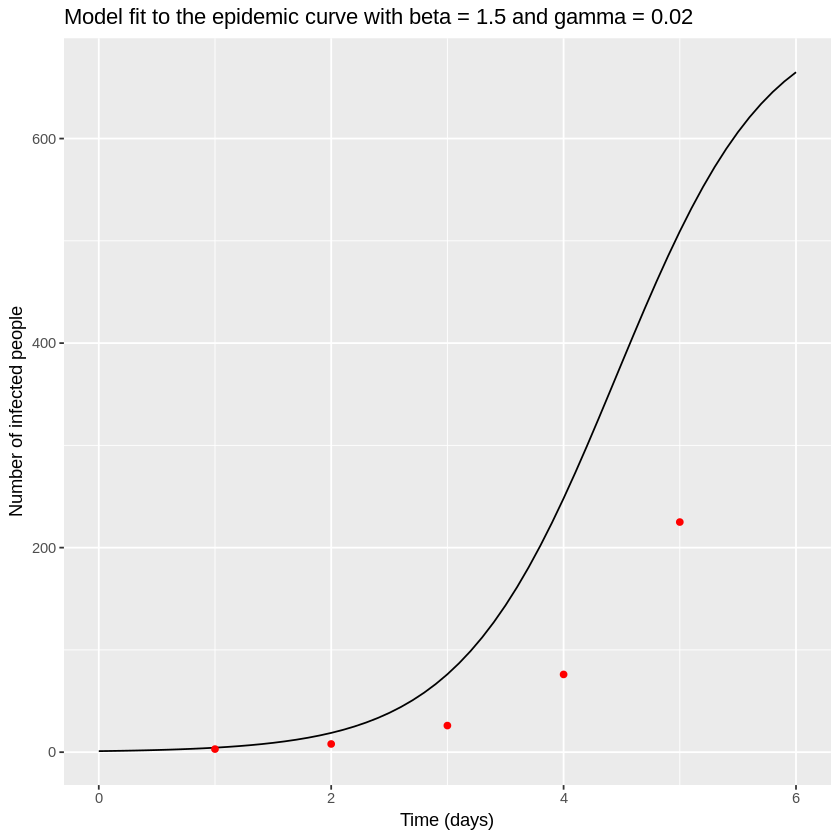

In [3]:
parameters <- c(beta = 1.5,
                gamma = 0.02)

# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +                               # plot the model prediction of the
                                                                                 # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

Now we have the opposite problem. With these parameter values, the number of infected people is overestimated by the model at all but the first timepoint. Let's try reducing $\beta$ again.

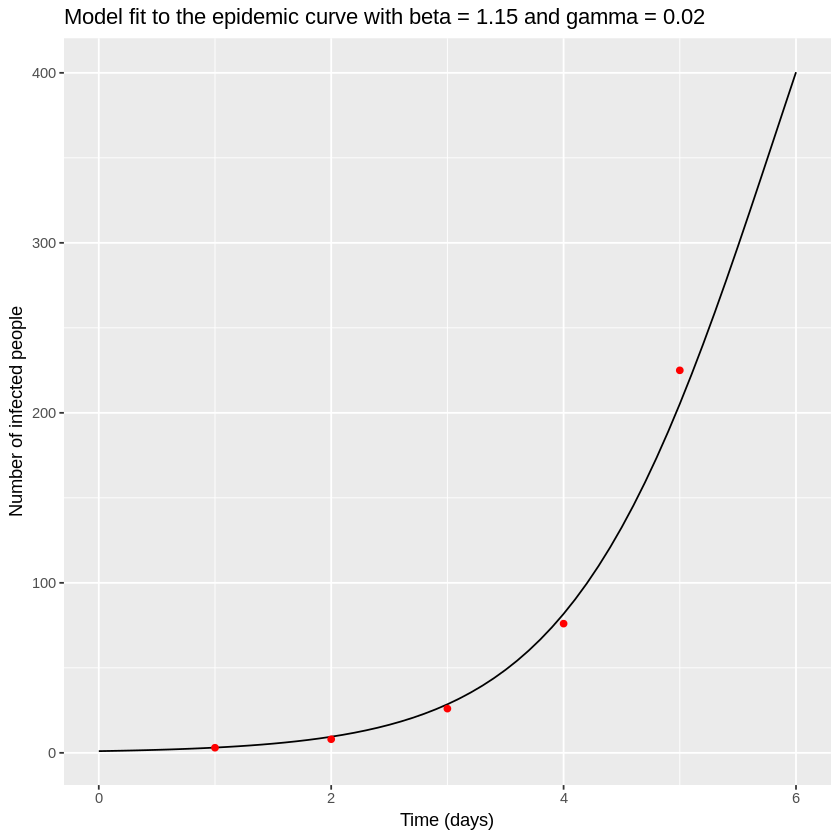

In [4]:
parameters <- c(beta = 1.15,
                gamma = 0.02)

# MODEL OUTPUT

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

# PLOT OF THE MODEL FIT

ggplot() +
  geom_line(data = output, aes(x = time, y = I)) +                               # plot the model prediction of the
                                                                                 # number infected as a line
  geom_point(data = data, aes(x = time, y = number_infected), colour = "red") +  # overlay the data as red dots
  xlab("Time (days)")+                                              
  ylab("Number of infected people") +                                 
  labs(title = paste("Model fit to the epidemic curve with beta =", parameters["beta"], 
                     "and gamma =", parameters["gamma"]))

With $\beta$ = 1.15 and $\gamma$ = 0.02 days$^{-1}$, the fit of the model prediction of the number of infected people over time to the data is looking quite good!